In [1]:
import pandas as pd
import numpy as np

# Читаем данные

In [2]:
data = pd.read_csv('fertility_Diagnosis.txt', sep=",", header=None)
data.columns = ["Season", "Age", "Diseases", "Trauma","Surg","Fevers","Alcohol","Smoking","NHSP","Diagnosis"]

In [3]:
data

,Season,Age,Diseases,Trauma,Surg,Fevers,Alcohol,Smoking,NHSP,Diagnosis
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,1
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,-1
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,1
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,1
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,-1
5,-0.33,0.67,1,0,1,0,0.8,0,0.50,1
6,-0.33,0.67,0,0,0,-1,0.8,-1,0.44,1
7,-0.33,1.00,1,1,1,0,0.6,-1,0.38,1
8,1.00,0.64,0,0,1,0,0.8,-1,0.25,1
9,1.00,0.61,1,0,0,0,1.0,-1,0.25,1


In [4]:
X = data[["Season", "Age", "Diseases", "Trauma","Surg","Fevers","Alcohol","Smoking","NHSP"]].get_values()
Y = data[["Diagnosis"]].get_values()

In [5]:
len(X)

100

In [6]:
# Матрица расстояний до объектов
from scipy.spatial import distance_matrix
import matplotlib.pyplot as plt
import seaborn as sns

metrics = distance_matrix(X, X, p=2)
#plt.figure(figsize=(10,10))
#plt.pcolor(metrics,cmap='RdBu')
#plt.colorbar()
#plt.show()


In [7]:
h_max = metrics.max()
h_min = metrics.min()
print(h_max)
print(h_min)

3.7542509239527395
0.0


### Вводим ядерные функции

In [8]:
def K_1(r):
    #assert (abs(r.all())<=1),"Bad argument!"
    r[(1 - r**2) < 0 ] = 1
    return 3/4*(1-r**2)

def K_2(r):
    #assert (abs(r.all())<=1),"Bad argument!"
    r[(1 - r**2) < 0 ] = 1
    return 15/16*((1-r**2)**2)

def K_3(r):
    #assert (abs(r.all())<=1),"Bad argument!"
    r[(1 - r**2) < 0 ] = 1
    return 1-abs(r)

def K_4(r):
    return ((2*np.pi)**(-0.5))*(np.exp(-0.5*r**2))

def K_5(r):
    #assert (abs(r.all())<=1),"Bad argument!"
    r[(1 - r**2) < 0 ] = 1
    return 0.5*abs(r)

In [9]:
K_1(metrics[3]/1.5)


array([0.3188    , 0.        , 0.        , 0.75      , 0.06306667,
       0.        , 0.        , 0.3425    , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.39766667, 0.3513    ,
       0.05583333, 0.        , 0.        , 0.        , 0.05596667,
       0.        , 0.        , 0.0365    , 0.        , 0.        ,
       0.        , 0.        , 0.20716667, 0.        , 0.        ,
       0.39383333, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [13]:
def count_errors(h, func):
    errors = 0
    for i in range(metrics.shape[0]):
            A = func(metrics[i]/h) * Y.T
            A[0][i]=0
            if (Y[i] == 1):
                A[A<0] /= 12
                A[A<0] /= h**9
                A[A > 0] /= 87
                A[A > 0] /= h**9
            elif (Y[i] == -1):
                A[A<0] /= 11
                A[A<0] /= h**9
                A[A > 0] /= 88
                A[A > 0] /= h**9
            if (np.sign(np.sum(A)) != Y[i]):
                errors += 1
    return errors

In [14]:
count_errors(0.8, K_1)

43

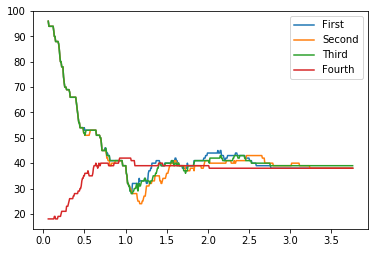

In [20]:
import matplotlib.pyplot as plt
x1 = list(np.linspace(0.06,3.76,500))
y1 = []
x2 = list(np.linspace(0.06,3.76,500))
y2 = []
x3 = list(np.linspace(0.06,3.76,500))
y3 = []
x4 = list(np.linspace(0.06,3.76,500))
y4 = []
x5 = list(np.linspace(0.06,3.76,500))
y5 = []
for _ in x1:
    y1.append(count_errors(_,K_1))
for _ in x2:
    y2.append(count_errors(_,K_2))
for _ in x3:
    y3.append(count_errors(_,K_3))
for _ in x4:
    y4.append(count_errors(_,K_4))

    
plt.plot(x1,y1,label='First')
plt.plot(x2,y2,label='Second')
plt.plot(x3,y3,label='Third')
plt.plot(x4,y4,label='Fourth')
plt.legend()

